# Health Care Project 

Importing the required libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


We would require sklearn library as well but we will import the necessary functions of it when and where needed

## Importing the data

In [2]:
heart_data=pd.read_excel("cep1_dataset.xlsx")

We have imported the data into a dataframe called heart_data

## Understanding the Data

1.a Finding the structure of data, missing values and duplicates

In [3]:
heart_data.shape

(303, 14)

The data has 303 records and 14 features

In [4]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The describe function helps us to get a good understanding of the data


In [5]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From the above result we can see that there are no null values

## Finding duplicates in the data

In [6]:
heart_data.loc[heart_data.duplicated()]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


We can see that the row number 164 is a duplicate

In [7]:
heart_data = heart_data.loc[~heart_data.duplicated()]

We have taken the inverse to eliminate the duplicate

In [8]:
heart_data.loc[heart_data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [9]:
heart_data.shape

(302, 14)

### We can see that the duplicate is removed

In [10]:
columns=heart_data.columns

In [11]:
print(columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


We have stored all the column names in the variable called columns

We can understand that the target column is the target variable, hence we can drop it from this dataframe and store it as a seperate numpy array

In [12]:
y=heart_data['target']

In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [14]:
X=heart_data.drop('target',axis=1)

In [15]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### We have stored our dependent/target variable in y and all the independent variables in X


### Since there are no null values, we do not require missing value treatment

## 2.a

In [16]:
X.mean()

age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
dtype: float64

In [17]:
X.median()

age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
dtype: float64

In [18]:
X.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.b

In [19]:
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

from the above data we can see that the columns age, trestbps, chol, thalach,old peak have a continuous value whereas sex, cp, fbs, restecg, exang, slope, ca, thal, target have discrete values

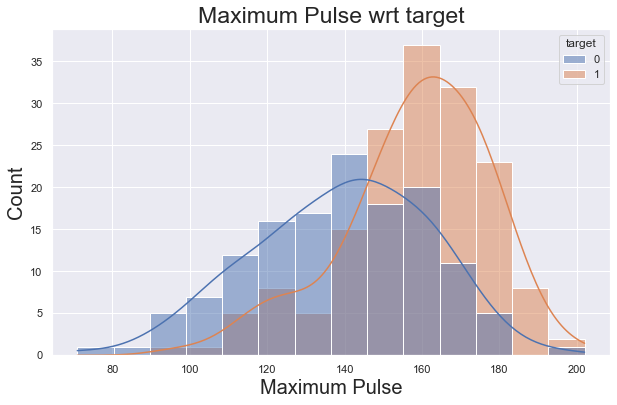

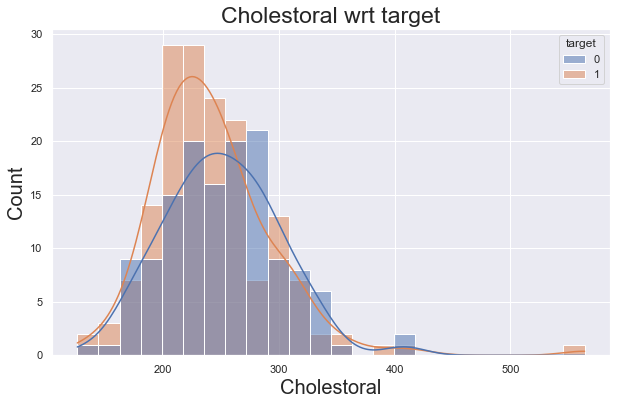

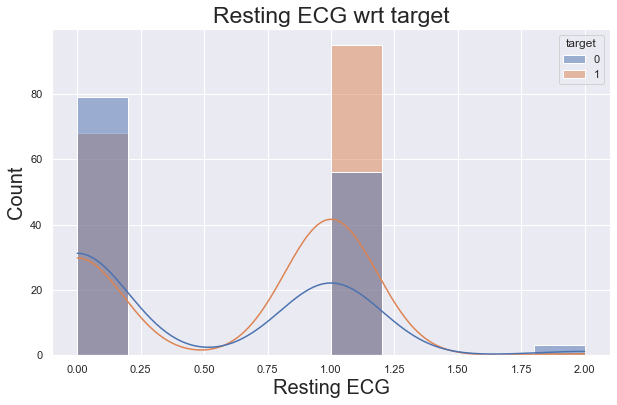

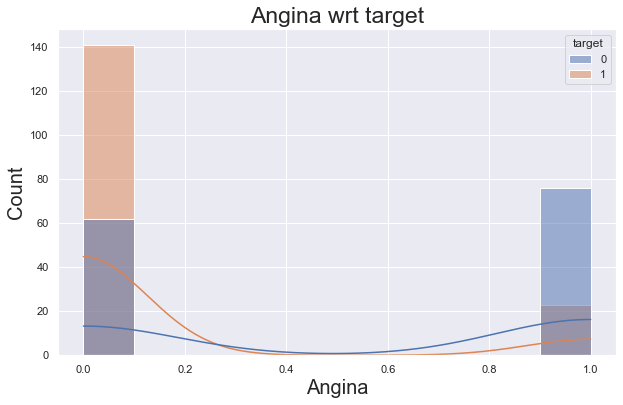

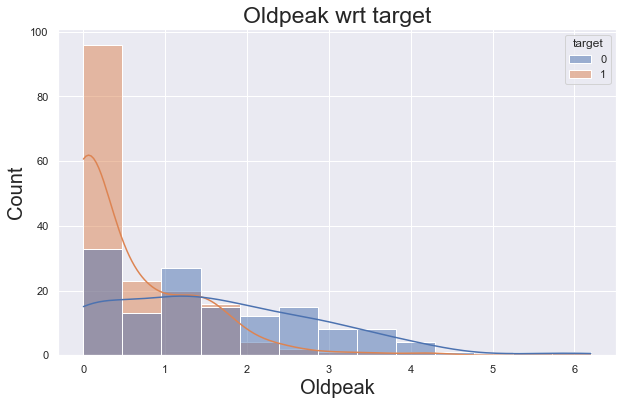

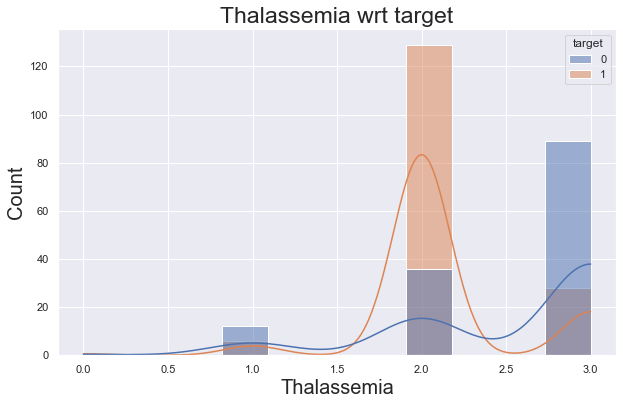

In [31]:
plt.figure(figsize=(10, 6))
p = sns.histplot(data = heart_data, x = 'thalach', kde = True, hue = 'target')
plt.xlabel("Maximum Pulse", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Maximum Pulse wrt target", fontsize=23)
plt.show(p)

plt.figure(figsize=(10, 6))
q = sns.histplot(data = heart_data, x = 'chol', kde = True, hue = 'target')
plt.xlabel("Cholestoral", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Cholestoral wrt target", fontsize=23)
plt.show(q)

plt.figure(figsize=(10, 6))
r = sns.histplot(data = heart_data, x = 'restecg', kde = True, hue = 'target')
plt.xlabel("Resting ECG", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Resting ECG wrt target", fontsize=23)
plt.show(r)

plt.figure(figsize=(10, 6))
s = sns.histplot(data = heart_data, x = 'exang', kde = True, hue = 'target')
plt.xlabel("Angina", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Angina wrt target", fontsize=23)
plt.show(s)

plt.figure(figsize=(10, 6))
t = sns.histplot(data = heart_data, x = 'oldpeak', kde = True, hue = 'target')
plt.xlabel("Oldpeak", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Oldpeak wrt target", fontsize=23)
plt.show(t)

plt.figure(figsize=(10, 6))
u = sns.histplot(data = heart_data, x = 'thal', kde = True, hue = 'target')
plt.xlabel("Thalassemia", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Thalassemia wrt target", fontsize=23)
plt.show(u)


## 2.c

<AxesSubplot:xlabel='age', ylabel='target'>

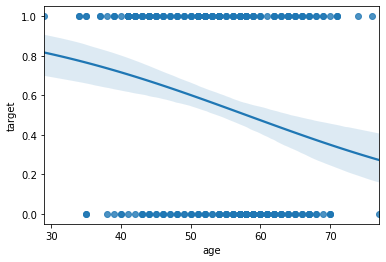

In [20]:
sns.regplot(data=heart_data,x=heart_data['age'],y=y,logistic=True)

<AxesSubplot:xlabel='age', ylabel='count'>

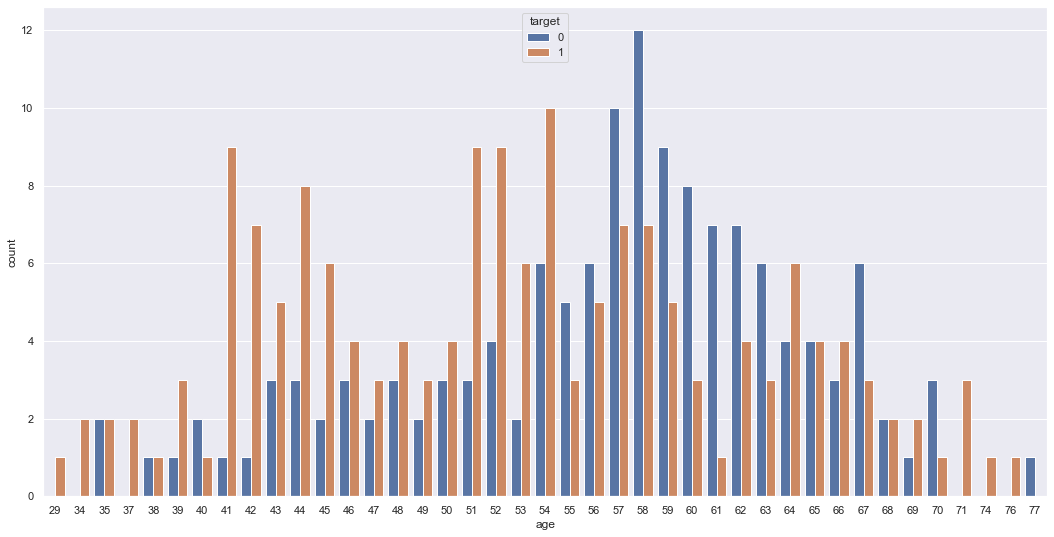

In [21]:
sns.set(rc={"figure.figsize":(18, 9)}) #width=8, height=4
sns.countplot(x=heart_data['age'],hue=y)

We can see from the above plot that the probability of getting heart disease is high between the ages of 40-45 and 50-55

<AxesSubplot:xlabel='age', ylabel='Count'>

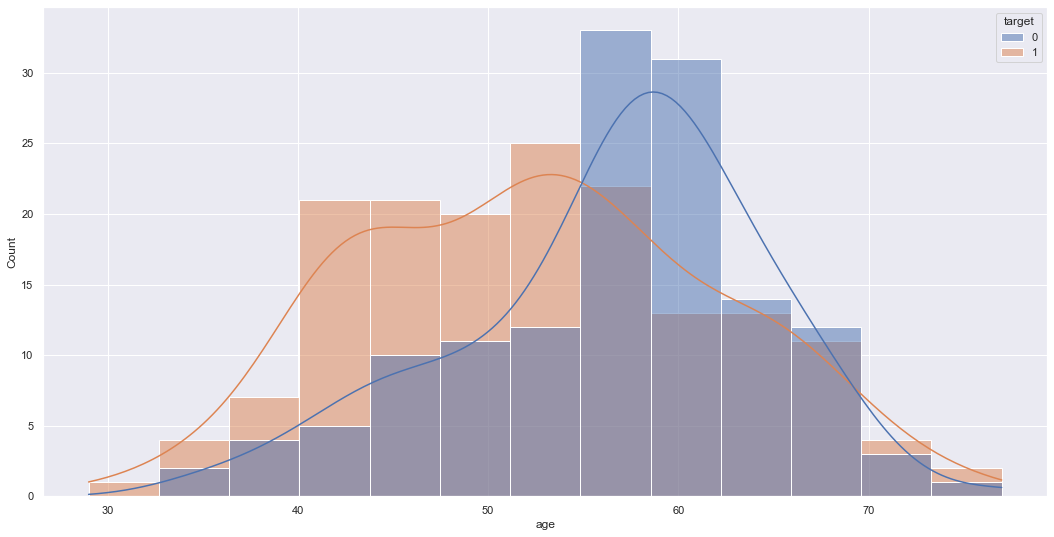

In [22]:
sns.set(rc={"figure.figsize":(18, 9)}) #width=8, height=4
sns.histplot(x=heart_data['age'],hue=y,kde=True)

<AxesSubplot:>

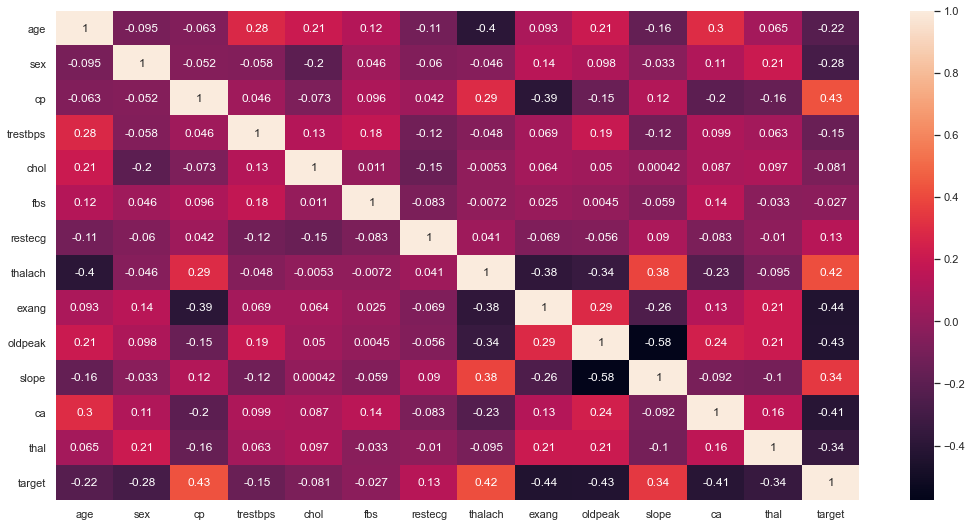

In [23]:
matrix=heart_data.corr()
sns.heatmap(matrix,annot=True)

From the above correlation heatmap we can deduce that the age is negatively corelated with the target variable. Also the correlation coefficient is very low (-0.23) so not much of an influence from age.

## 2.d

In [24]:
heart_data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

Text(0, 0.5, 'Count')

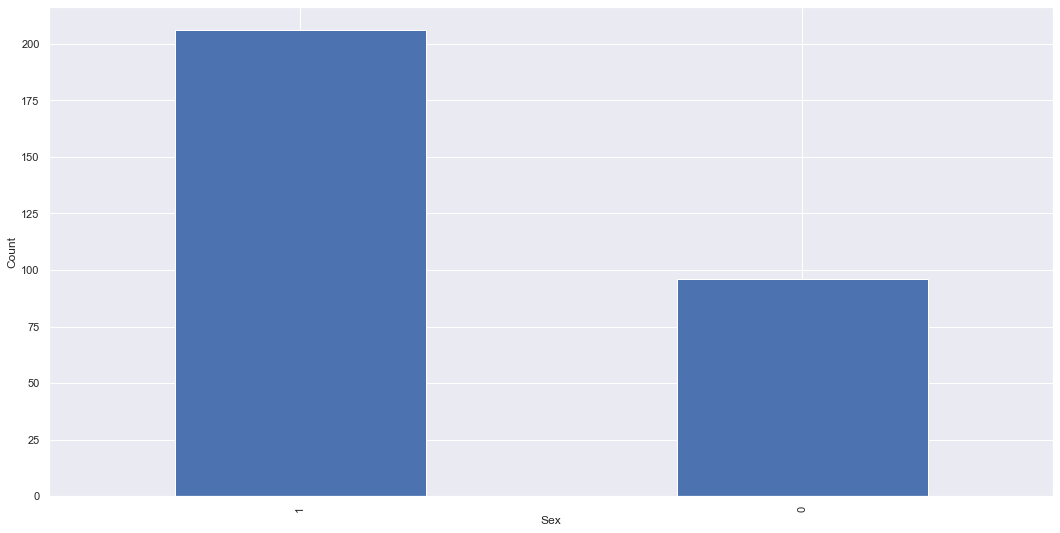

In [25]:
ax=heart_data['sex'].value_counts().plot(kind='bar')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')

We can see that the dataset contains 207 male and 96 female

Now let us check the possibility of getting heart diseases based on age

In [26]:
#heart_data.head()
#heart_data.query('target==1').groupby('age')['target'].agg(['count']).sort_values('count',ascending=False).plot(kind='bar',title='Count of CVD w.r.t age',figsize=(24,12),)
df=heart_data.query('target==1').groupby('age')['target'].agg(['count'])
df

,count
age,
29,1
34,2
35,2
37,2
38,1
39,3
40,1
41,9
42,7


### From the above plot we can see that the people of age 54 have mostly been affected by heart disease and 75 are the least

In [27]:
df1=heart_data['age'].value_counts()
df1

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
71     3
37     2
38     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

## 2.e

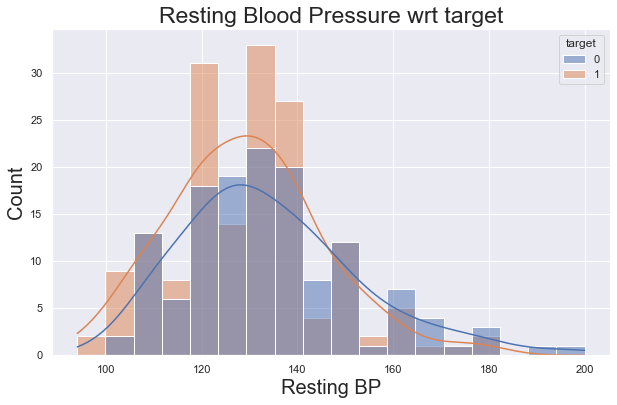

In [32]:
plt.figure(figsize=(10, 6))
v = sns.histplot(data = heart_data, x = 'trestbps', kde = True, hue = 'target')
plt.xlabel("Resting BP", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Resting Blood Pressure wrt target", fontsize=23)
plt.show(v)


From the above plot we can see that the chances of getting affected by heart disease is high when the resting blood pressure is between 120 and 140. We can also see that the chances of getting affected by heart disease is less when the value is an outlier. So we an conclude that anomalies in the resting blood pressure is not a major cause of heart disease.

## 2.f

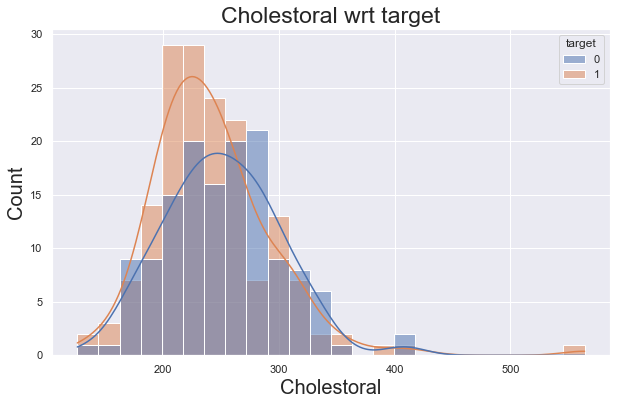

In [33]:
plt.figure(figsize=(10, 6))
q = sns.histplot(data = heart_data, x = 'chol', kde = True, hue = 'target')
plt.xlabel("Cholestoral", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Cholestoral wrt target", fontsize=23)
plt.show(q)

From the above plot we can see that the chances of heart disease is high when the cholesterol levels are between 180 and 280. 

## 2.g

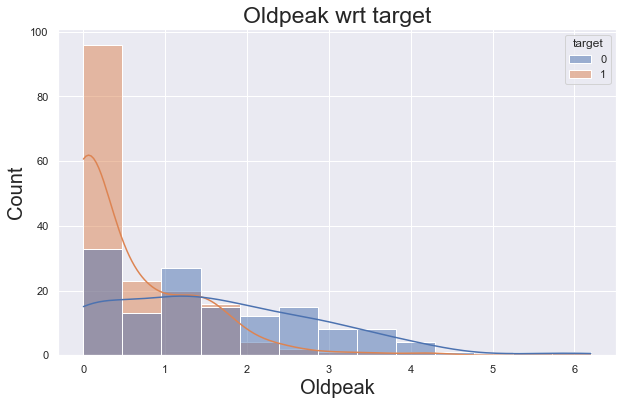

In [35]:
plt.figure(figsize=(10, 6))
t = sns.histplot(data = heart_data, x = 'oldpeak', kde = True, hue = 'target')
plt.xlabel("Oldpeak", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Oldpeak wrt target", fontsize=23)
plt.show(t)

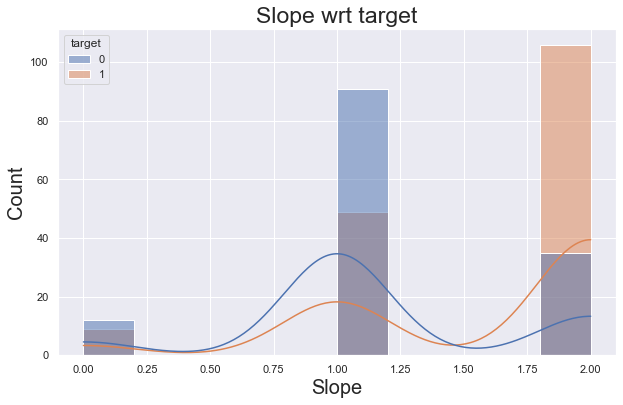

In [38]:
plt.figure(figsize=(10, 6))
w = sns.histplot(data = heart_data, x = 'slope', kde = True, hue = 'target')
plt.xlabel("Slope", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Slope wrt target", fontsize=23)
plt.show(t)

From the above plots we can see that when the ST depression when exercising wrt rest is 0 there is a high chance of getting heart disease and when the slope is 2 there is a high chance of getting heart disease

## 2.h

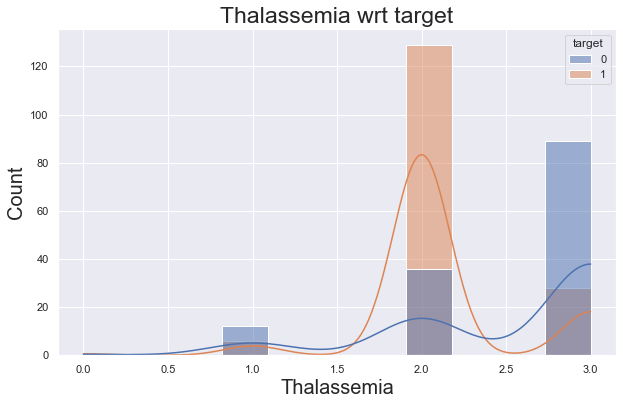

In [44]:
plt.figure(figsize=(10, 6))
u = sns.histplot(data = heart_data, x = 'thal', kde = True, hue = 'target')
plt.xlabel("Thalassemia", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Thalassemia wrt target", fontsize=23)
plt.show(u)

From the above plot we can see that the chances of getting hert disease is high when the value of thalasemia is 2. Also from the correlation matrix we can see that thalasemia and target variable are negatively corelated. The negative corelation value is -0.3 which is not a huge corelation. From these observations we can say that thalasemia is not a huge deciding factor for heart disease but when compared to the corelation of other variables it does play a huge role

## 2.j

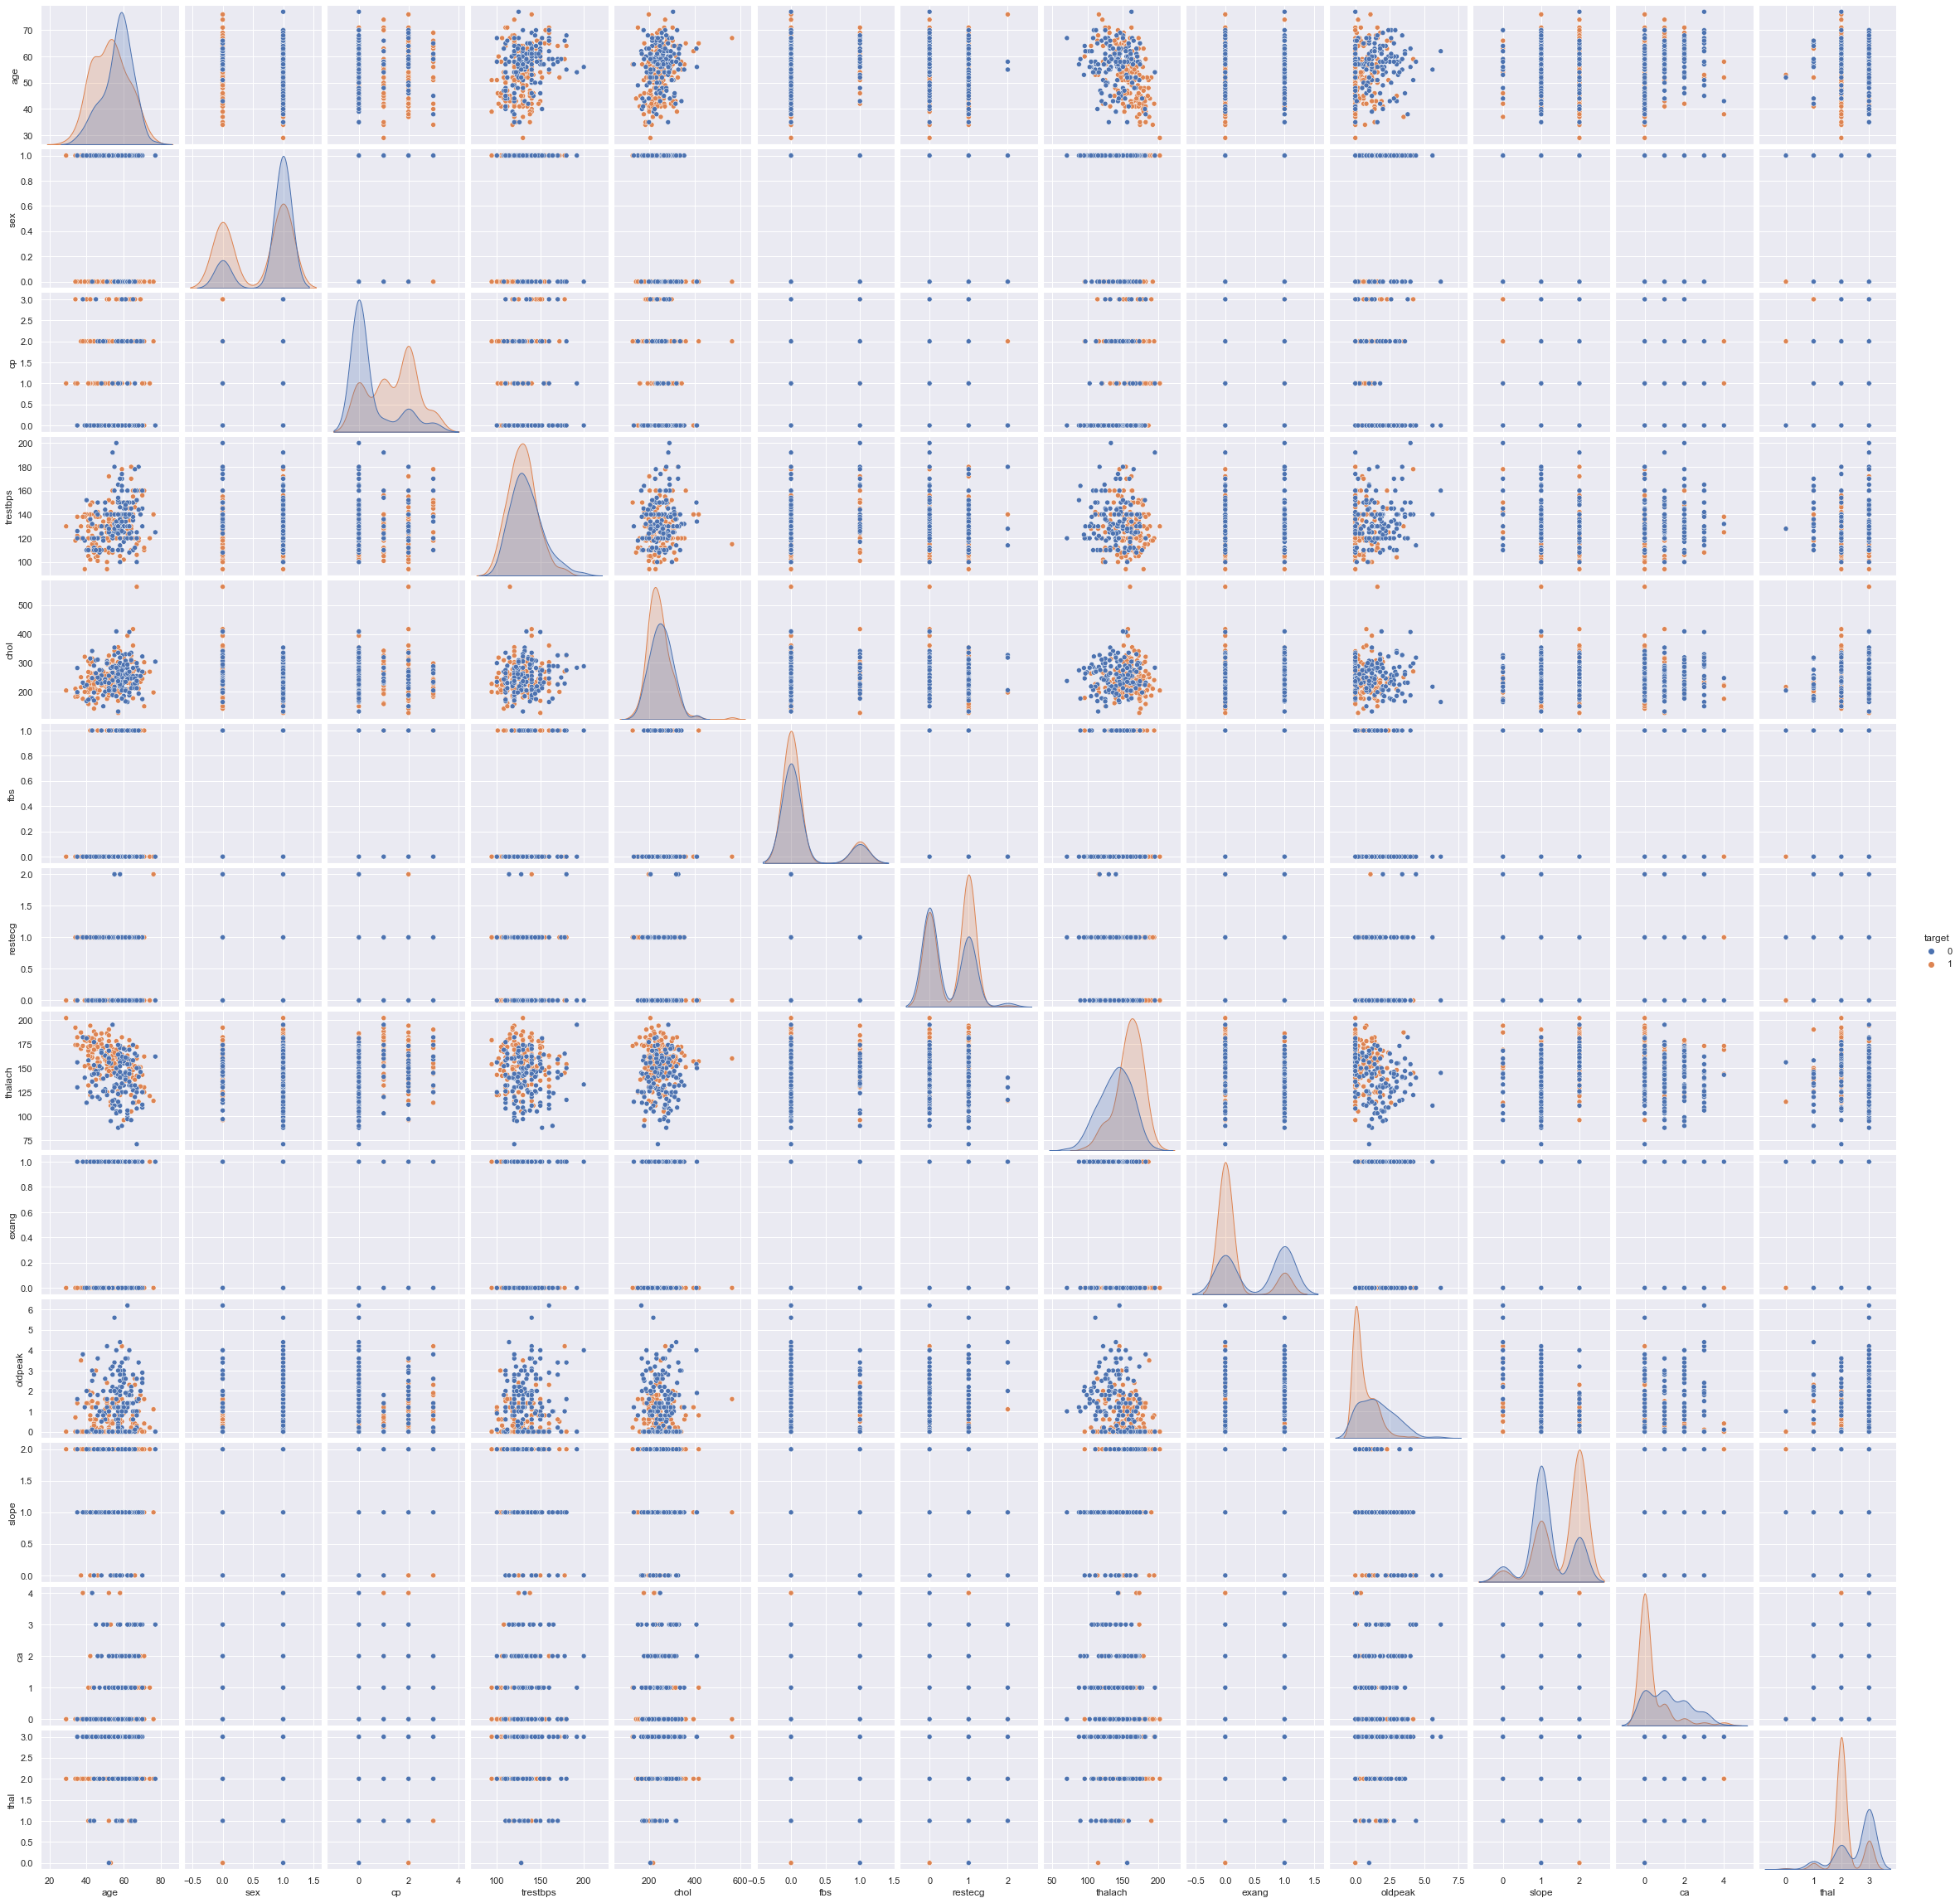

In [46]:
sns.pairplot(data=heart_data,hue ='target')

## 3

## Preparing data for modelling

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

### Model 1 - Logistic Regression

In [50]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



### We can see that the accuracy is 79%

## Model 2 - Random Forest

In [52]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state=1)# get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy


              precision    recall  f1-score   support

           0       0.70      0.79      0.74        38
           1       0.83      0.75      0.79        53

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.77      0.77        91



### We can see that the accuracy is 77%

## From the above accuracy ratings we can conclude that Logistic Regression model has a better accuracy as compared to Random Forest model

## Also we can see that the recall value for the target variable 1 is higher in Logistic Regression is higher than in Random Forest. For this particular scenario, the recall has to be higher than Precision


Feature: 0, Score: 0.01478
Feature: 1, Score: -1.75391
Feature: 2, Score: 0.89022
Feature: 3, Score: -0.02213
Feature: 4, Score: -0.00525
Feature: 5, Score: 0.12787
Feature: 6, Score: 0.34092
Feature: 7, Score: 0.04315
Feature: 8, Score: -1.00784
Feature: 9, Score: -0.65549
Feature: 10, Score: 0.29011
Feature: 11, Score: -0.87808
Feature: 12, Score: -0.76466


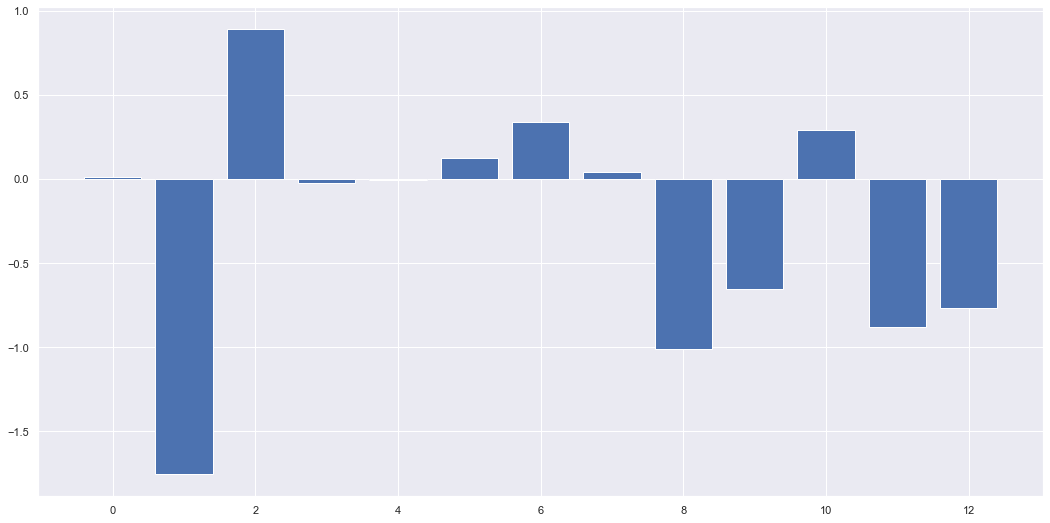

In [57]:
# get importance
importance = model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<AxesSubplot:>

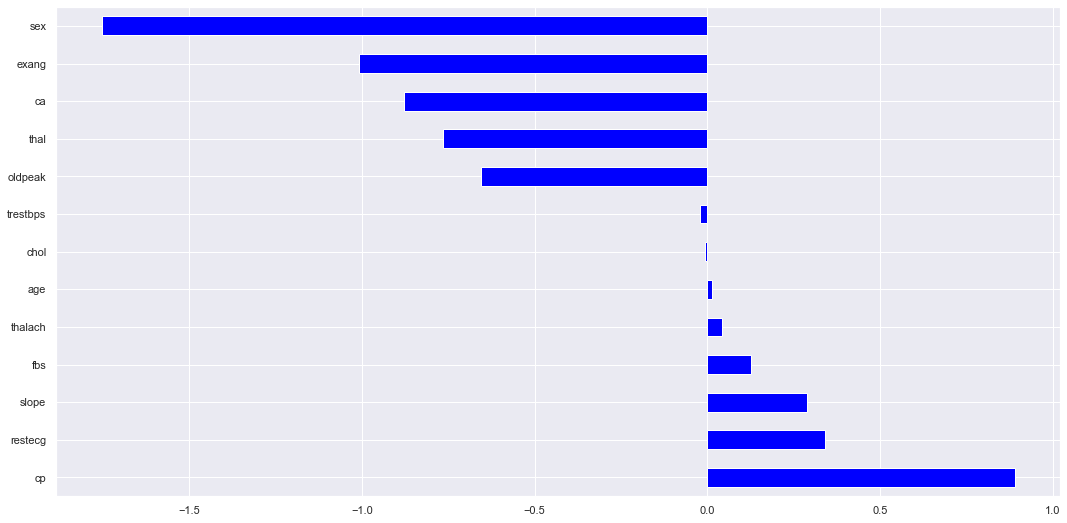

In [59]:
index= heart_data.columns[:-1]
importance = pd.Series(model1.coef_[0], index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

### From the above graph we can say that the major features are Sex, ca, thal,old peak and cp